# United Nations General Debate Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob
# for NLP related tasks
import spacy
import string
nlp=spacy.load('en_core_web_sm',disable=["tagger", "parser"])

# Importing Data

In [3]:
folders = glob.glob('Converted sessions/Session*')

In [4]:
# Let's check the folders we have
folders

['Converted sessions\\Session 25 - 1970',
 'Converted sessions\\Session 26 - 1971',
 'Converted sessions\\Session 27 - 1972',
 'Converted sessions\\Session 28 - 1973',
 'Converted sessions\\Session 29 - 1974',
 'Converted sessions\\Session 30 - 1975',
 'Converted sessions\\Session 31 - 1976',
 'Converted sessions\\Session 32 - 1977',
 'Converted sessions\\Session 33 - 1978',
 'Converted sessions\\Session 34 - 1979',
 'Converted sessions\\Session 35 - 1980',
 'Converted sessions\\Session 36 - 1981',
 'Converted sessions\\Session 37 - 1982',
 'Converted sessions\\Session 38 - 1983',
 'Converted sessions\\Session 39 - 1984',
 'Converted sessions\\Session 40 - 1985',
 'Converted sessions\\Session 41 - 1986',
 'Converted sessions\\Session 42 - 1987',
 'Converted sessions\\Session 43 - 1988',
 'Converted sessions\\Session 44 - 1989',
 'Converted sessions\\Session 45 - 1990',
 'Converted sessions\\Session 46 - 1991',
 'Converted sessions\\Session 47 - 1992',
 'Converted sessions\\Session 48 -

In [5]:
# We'll create an empty dataframe in which we will append every speech row-by-row
df_speech = pd.DataFrame(columns = {'Country', 'Speech', 'Session', 'Year'})

In [6]:
folders[0]

'Converted sessions\\Session 25 - 1970'

In [7]:
# loop through all folders
for file in folders:
    
    # get all text files in the current folder
    speech = glob.glob(file+'/*.txt')
    
    # loop through all text files in the current folder
    for i in range(len(speech)):
        
        # read the text file
        with open(speech[i], encoding='utf8') as f:
            speech_text = f.read()
        
        # extract the year from the filename
        year = speech[i].split('_')[-1].split('.')[0]
        
        # extract the session from the filename
        session = speech[i].split('_')[-2]
        
        # extract the country name from the filename
        country = speech[i].split('_')[0].split("\\")[-1]
        
       # create a dataframe with the speech data
        df_speech_i = pd.DataFrame({'Country': [country], 'Speech': [speech_text], 'Session': [session], 'Year': [year]})
        
        # concatenate the new dataframe with the main dataframe
        df_speech = pd.concat([df_speech, df_speech_i], ignore_index=True)

In [8]:
# Let's check the total number of speeches we have
len(df_speech)

8093

In [9]:
# Let's have a look at the dataframe we created
df_speech.head()

,Speech,Country,Session,Year
0,33: May I first convey to our President the co...,ALB,25,1970
1,177.\t : It is a fortunate coincidence that pr...,ARG,25,1970
2,100.\t It is a pleasure for me to extend to y...,AUS,25,1970
3,155.\t May I begin by expressing to Ambassado...,AUT,25,1970
4,"176. No doubt each of us, before coming up to ...",BEL,25,1970


In [10]:
# The code below helps us store all the speeches we have in an excel file
#df_speech.to_excel("UN_Speeches.xlsx",  encoding='utf-8')

In [11]:
# For additional work on the speeches, we can directly read from the excel and develop on our work
# df_speech = pd.read_excel('UN_Speeches.xlsx')

In [12]:
# Let's check the average speeches per country
speech_count = df_speech['Country'].value_counts()

In [13]:
speech_count.mean()

40.465

In [14]:
# Let's check how many countries participate in UN General assembly
len(speech_count)

200

In [15]:
# Let's save the sppech count to plot in on a map for further analysis
# speech_count.to_csv("speech_count.csv")

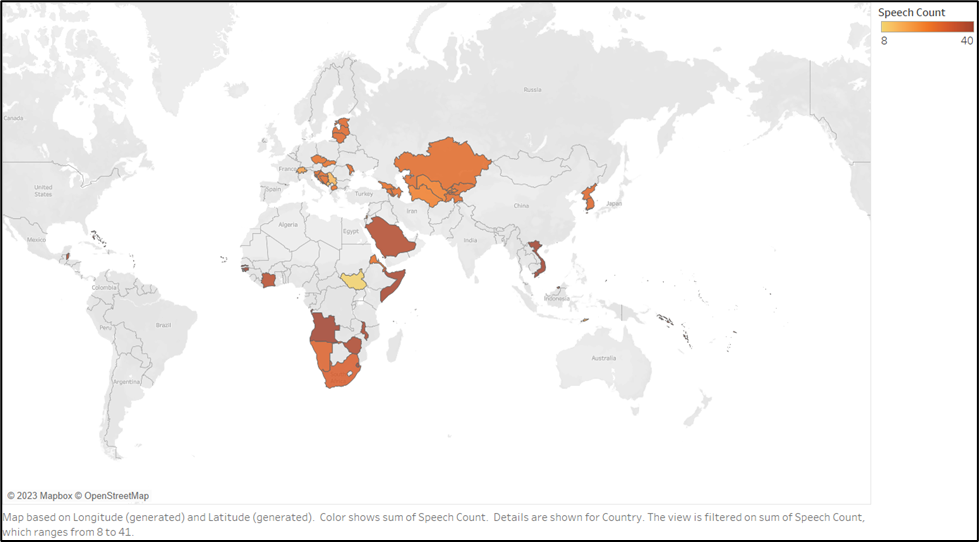

# Text Preprocessing - Stage 1

In [16]:
# function to preprocess speech
def clean(text):
    #removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    #remove any numbers
    text = re.sub(r'\d+', '', text)
    # removing new line characters
    # text = re.sub('\n', '', str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",'',str(text))
    text = re.sub("- ",'',str(text))
    text = re.sub("—",' ',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.", '', str(text))
    text = re.sub("Mrs\.", '', str(text))
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # converting text to lowercase
    text = text.lower()
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", '', str(text))
    doc=nlp(text)
    # remove stopwords and lemmatize the text
    tokens=[token.lemma_ for token in doc if(token.is_stop==False)]
    #join tokens by space
    return " ".join(tokens)

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# create a set of stopwords including custom stopwords
stop_words = set(stopwords.words('english'))

# create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean1(text):

    # tokenize the text
    tokens = nltk.word_tokenize(text)
    # remove stopwords and lemmatize the text
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    # join tokens by space
    return " ".join(tokens)


In [18]:
# Let's apply both our cleaning functions to our dataframe
df_speech.loc[:, 'Speech_clean'] = df_speech['Speech'].apply(clean)
df_speech.loc[:, 'Speech_clean'] = df_speech['Speech_clean'].apply(clean1)

C:\Users\DELL\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [19]:
# Let's check our dataframe
df_speech.head()

,Speech,Country,Session,Year,Speech_clean
0,33: May I first convey to our President the co...,ALB,25,1970,convey president congratulation albanian deleg...
1,177.\t : It is a fortunate coincidence that pr...,ARG,25,1970,fortunate coincidence precisely time united na...
2,100.\t It is a pleasure for me to extend to y...,AUS,25,1970,pleasure extend president warmest congratulati...
3,155.\t May I begin by expressing to Ambassado...,AUT,25,1970,begin expressing ambassador hambro behalf dele...
4,"176. No doubt each of us, before coming up to ...",BEL,25,1970,doubt coming rostrum wonder usefulness futilit...


In [20]:
# Let's save the output of stage 1 cleaning in an excel
# df_speech.to_excel("UN_Speeches_All.xlsx",  encoding='utf-8')

In [21]:
# This is how our speech was initially
df_speech['Speech'][0]

'33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth session of the General Assembly?\n34.\tIn taking up the work on the agenda of the twenty- fifth session of the General Assembly, which is being held on the eve of the twenty-fifth anniversary of the coming into force of the Charter of the United Nations, the peace-loving Member States would have wished to be in a position to present on this occasion some picture of positive and satisfactory activity on the part of the United Nations. The Albanian delegation, for its part, would have taken great pleasure in drawing up such a balance sheet of activities covering a quarter of a century, which is certainly no short period in the life of an international organization. Unfortunately, this is not the situation. Created on the day after victory had been achieved over the Powers of the Rome BerlinTokyo Axis and conceived in the spirit of the principles wh

In [22]:
# This is how speech looks post Stage 1 of cleaning
df_speech['Speech_clean'][0]

'convey president congratulation albanian delegation election presidency twentyfifth session general assembly taking work agenda fifth session general assembly held eve twentyfifth anniversary coming force charter united nation peaceloving member state wished position present occasion picture positive satisfactory activity united nation albanian delegation taken great pleasure drawing balance sheet activity covering quarter century certainly short period life international organization unfortunately situation created day victory achieved power rome berlintokyo axis conceived spirit principle predominated war antifascist coalition organization awakened progressive humanity hope serve important factor creating better international condition order favor cause freedom peace world security activity number event occurred world arena period disappointed hope people united nation far contributed required fundamental provision charter consolidation international peace security liberation strugg

# Exploratory Analysis I

## Named Entity Analysis

**Let's analyse the named entities that are most frequently used in the UN speeches**

C:\Users\DELL\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


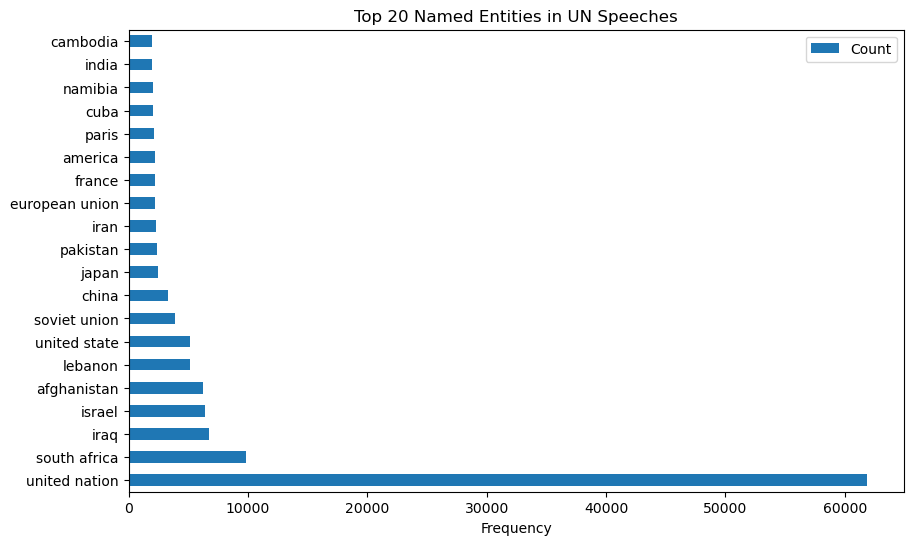

In [23]:
from collections import Counter

# Create a list of named entities for each speech using spaCy
df_speech['Named_Entities'] = df_speech['Speech_clean'].apply(lambda x: [ent.text for ent in nlp(x).ents if ent.label_ in ['PERSON', 'ORG', 'GPE']])

# Count the frequency of each named entity
named_entity_counts = Counter([entity for entities in df_speech['Named_Entities'] for entity in entities])

# Create a DataFrame from the named entity counts
df_named_entities = pd.DataFrame.from_dict(named_entity_counts, orient='index', columns=['Count'])

# Sort the named entities by frequency in descending order
df_named_entities = df_named_entities.sort_values('Count', ascending=False)

# Plot the top 20 named entities
fig, ax = plt.subplots(figsize=(10, 6))
df_named_entities[:20].plot(kind='barh', ax=ax)
ax.set_xlabel('Frequency')
ax.set_title('Top 20 Named Entities in UN Speeches')
plt.show()

## Word Frequency Analysis

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

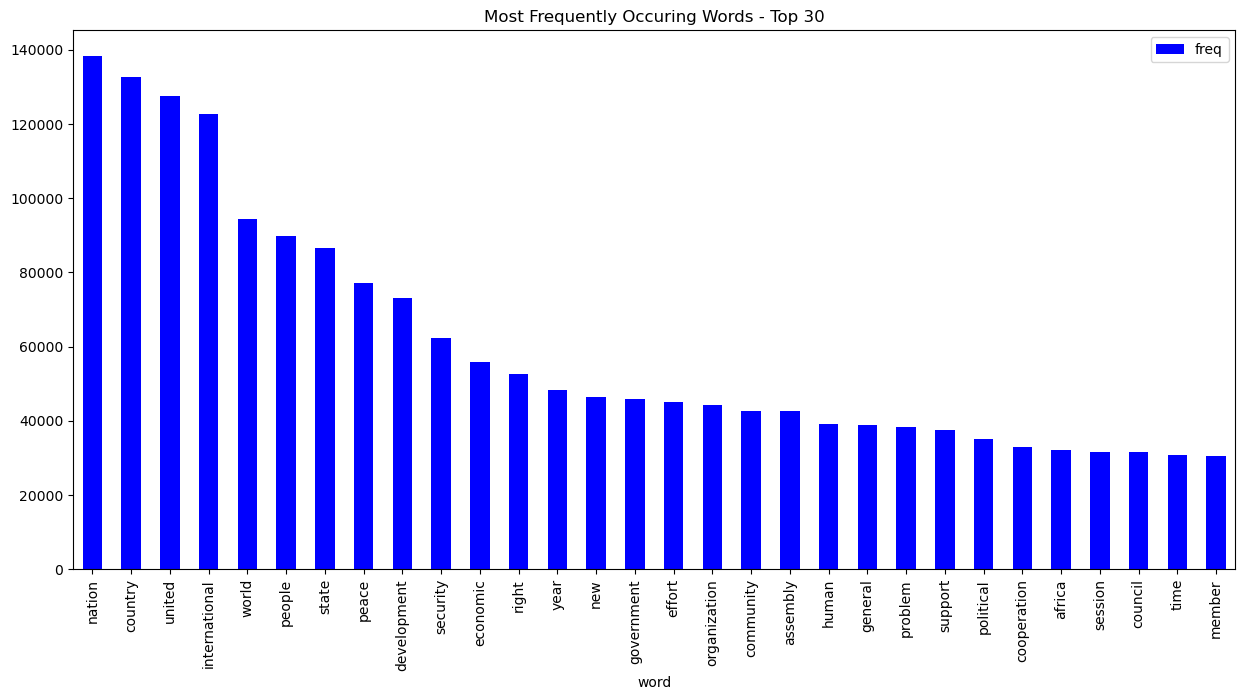

In [24]:
# Word-Frequency Analysis

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df_speech.Speech_clean)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


In [25]:
from nltk.tokenize import word_tokenize
# tokenize the speeches
df_speech['tokens'] = df_speech['Speech_clean'].apply(lambda x: word_tokenize(x))

In [26]:
# Let's check our dataframe
df_speech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8093 entries, 0 to 8092
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Speech          8093 non-null   object
 1   Country         8093 non-null   object
 2   Session         8093 non-null   object
 3   Year            8093 non-null   object
 4   Speech_clean    8093 non-null   object
 5   Named_Entities  8093 non-null   object
 6   tokens          8093 non-null   object
dtypes: object(7)
memory usage: 442.7+ KB


In [27]:
df_speech['Year'] = df_speech['Year'].astype('int')

## WordCloud

Text(0.5, 1.0, 'WordCloud - Top Keywords')

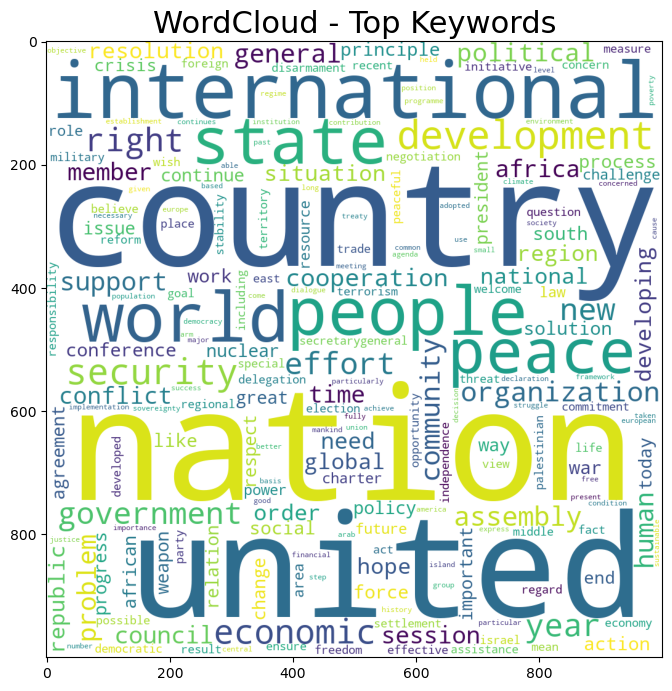

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Top Keywords", fontsize = 22)

# Text Preprocessing - Stage 2

**Most of the top words seem to be 'united', 'nations', 'international', 'world', 'countries' and these do not add much value to our analysis. Let's remove these and any named entities that are either countries or locations.**

In [29]:
def remove_entities(text):
    doc = nlp(text)
    # Extract all location entities
    locations = set([ent.text.lower() for ent in doc.ents if (ent.label_ == 'GPE' or ent.label_ == 'LOC')])
    # Remove all location entities from text
    for loc in locations:
        pattern = re.compile(fr"\b{loc}\b", re.IGNORECASE)
        text = pattern.sub("", text)
    return text

In [30]:
df_speech['Speech_cleaned'] = df_speech['Speech_clean'].apply(remove_entities)

C:\Users\DELL\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


# Text Preprocessing - Stage 3

**Apart from standard stopwords, there are a number of other keywords that do not add much value to our analysis. These are found in an iterative way after text cleaning, and then checking top keywords, wordcloud and the generated topics and cleaned at every iteration. The custom stopword list added below is the result of the multiple iterations and subsequent analysis.**

In [31]:
# Let's create our custom stopword list
custom_stopwords = stopwords.words('english') + ['united', 'nations', 'international', 'world', 'countries', 'states', 
                                                 'national', 'way', 'new', 'general','country', 'years','today','year',
                                                 'state', 'organization', 'council', 'south', 'important', 'nation', 'people',
                                                     'right', 'effort', 'time', 'government', 'work', 'assembly','need',
                                                     'relation','member', 'interest', 'conference', 'situation', 'question',
                                                    'chinese', 'european', 'long', 'continue', 'like', 'system', 'use', 
                                                     'country', 'session', 'region', 'policy', 'president', 'african',
                                                    'order', 'global', 'republic', 'end', 'set', 'level', 'decade', 'meeting',
                                                    'area', 'welcome', 'regard','current', 'including', 'place','mean',
                                                    'secretarygeneral', 'particularly', 'fact','measure', 'universal', 
                                                    'form', 'arab', 'free', 'result', 'group', 'fully', 'ukraine', 'tajikistan',
                                                     'côte', 'ivoire', 'moldova', 'uzbekistan', 'belarus', 'faso', 'burkina', 
                                                     'boutros', 'croatia', 'herzegovina', 'armenia', 'macedonia', 'azerbaijan', 
                                                     'balkan', 'kazakhstan', 'albanian', 'osce', 'armenian', 'charter', 'day'
                                                    , 'bring', 'number', 'high', 'able', 'face', 'based','basis', 
                                                    'slovakia', 'andorra', 'turkmenistan', 'timorleste', 'rwanda', 'maldives', 
                                                     'boutrosghali', 'karabakh', 'myanmar', 'azerbaijani', 'georgian', 'abkhazia'
                                                    , 'continues', 'small','party', 'far', 'body', 'cent', 'past', 'recent',
                                                    'continent', 'especially', 'particular', 'necessary', 'far', 'wish', 'ago',
                                                    'adopted', 'remain', 'find', 'term', 'taken', 'certain', 'come', 'great',
                                                    'given', 'million', 'field', 'burundi', 'sierra', 'leone', 'congo', 'ecowas', 
                                                     'angola','guinea', 'caribbean', 'trinidad', 'tobago','paraguay','chile',
                                                     'bolivia', 'american', 'solomon', 'papua','fiji']

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove NLTK stopwords and custom stopwords
    # Create a custom list of stopwords

    filtered_tokens = [token for token in tokens if token not in custom_stopwords]
    # Rejoin the filtered tokens into a string
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Example usage on a DataFrame column named 'Speech':
df_speech['Speech_cleaned_final'] = df_speech['Speech_cleaned'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df_speech.head()

,Speech,Country,Session,Year,Speech_clean,Named_Entities,tokens,Speech_cleaned,Speech_cleaned_final
0,33: May I first convey to our President the co...,ALB,25,1970,convey president congratulation albanian deleg...,"[agenda fifth, united nation, rome, america, u...","[convey, president, congratulation, albanian, ...",convey president congratulation albanian deleg...,convey congratulation delegation election pres...
1,177.\t : It is a fortunate coincidence that pr...,ARG,25,1970,fortunate coincidence precisely time united na...,"[liberia, abdel nasser, united nation, san fra...","[fortunate, coincidence, precisely, time, unit...",fortunate coincidence precisely time united na...,fortunate coincidence precisely celebrating tw...
2,100.\t It is a pleasure for me to extend to y...,AUS,25,1970,pleasure extend president warmest congratulati...,"[australia, randolph liberia, united nation, s...","[pleasure, extend, president, warmest, congrat...",pleasure extend president warmest congratulati...,pleasure extend warmest congratulation delegat...
3,155.\t May I begin by expressing to Ambassado...,AUT,25,1970,begin expressing ambassador hambro behalf dele...,"[hambro behalf, austria, united nation, abdel ...","[begin, expressing, ambassador, hambro, behalf...",begin expressing ambassador hambro behalf dele...,begin expressing ambassador hambro behalf dele...
4,"176. No doubt each of us, before coming up to ...",BEL,25,1970,doubt coming rostrum wonder usefulness futilit...,"[united nation, united nation, united nation, ...","[doubt, coming, rostrum, wonder, usefulness, f...",doubt coming rostrum wonder usefulness futilit...,doubt coming rostrum wonder usefulness futilit...


**Let's check how our multiple stages of cleaning have reduced the character count of the speeches.**

In [34]:
# Get the character length of all speeches after each stage of cleaning
df_speech['len1'] = df_speech['Speech'].str.len()
df_speech['len2'] = df_speech['Speech_clean'].str.len()
df_speech['len3'] = df_speech['Speech_cleaned'].str.len()
df_speech['len4'] = df_speech['Speech_cleaned_final'].str.len()


In [35]:
# Let's check the statistics of character counts of speeches
df_speech[['len1', 'len2', 'len3', 'len4']].describe()

,len1,len2,len3,len4
count,8093.000000,8093.000000,8093.000000,8093.000000
mean,17593.616953,11105.210429,10835.650315,8548.782281
std,7771.594294,4799.401695,4647.094430,3696.685997
min,2362.000000,1298.000000,1273.000000,965.000000
25%,11811.000000,7511.000000,7356.000000,5803.000000
50%,15939.000000,10129.000000,9912.000000,7803.000000
75%,21957.000000,13876.000000,13470.000000,10623.000000
max,72041.000000,43825.000000,42984.000000,34345.000000


In [36]:
# Let's keep only the primary columns that are needed
df_final = df_speech[['Year', 'Country', 'Speech_cleaned_final']]

In [37]:
# Let's check our cleaned dataframe
df_final.head()

,Year,Country,Speech_cleaned_final
0,1970,ALB,convey congratulation delegation election pres...
1,1970,ARG,fortunate coincidence precisely celebrating tw...
2,1970,AUS,pleasure extend warmest congratulation delegat...
3,1970,AUT,begin expressing ambassador hambro behalf dele...
4,1970,BEL,doubt coming rostrum wonder usefulness futilit...


# Exploratory Analysis II

## Word Frequency Analysis

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

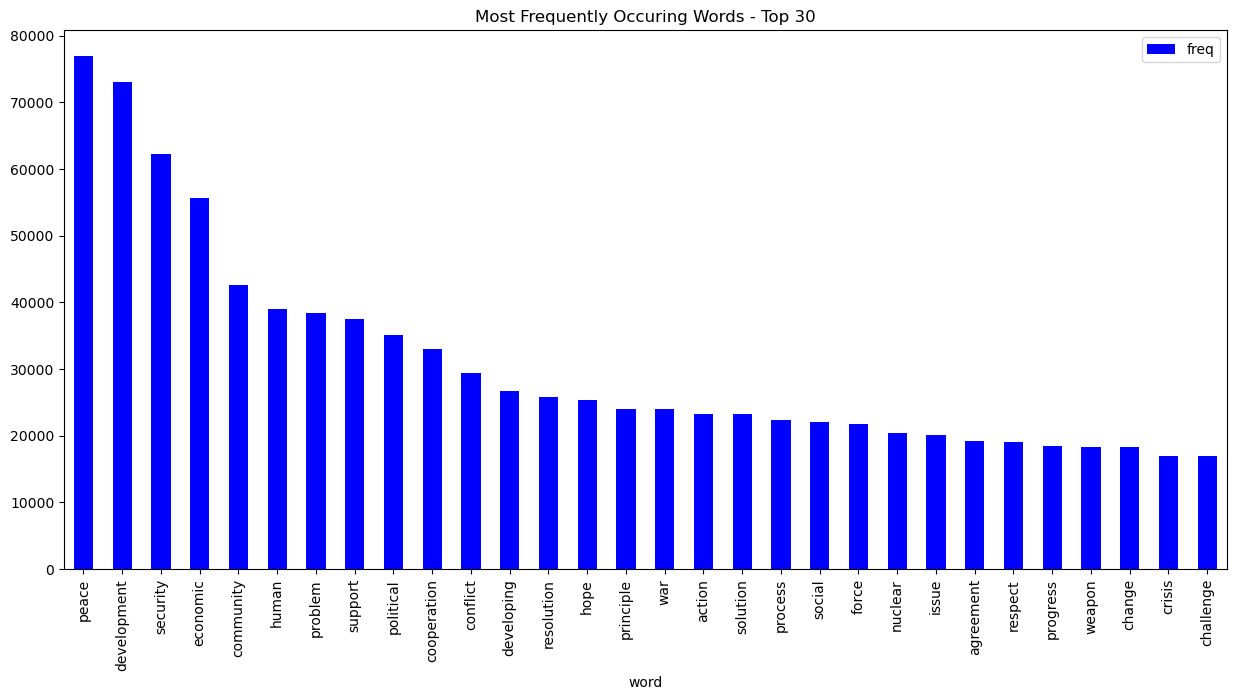

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = custom_stopwords)
words = cv.fit_transform(df_final.Speech_cleaned_final)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


## WordCloud

Text(0.5, 1.0, 'WordCloud - Top Keywords')

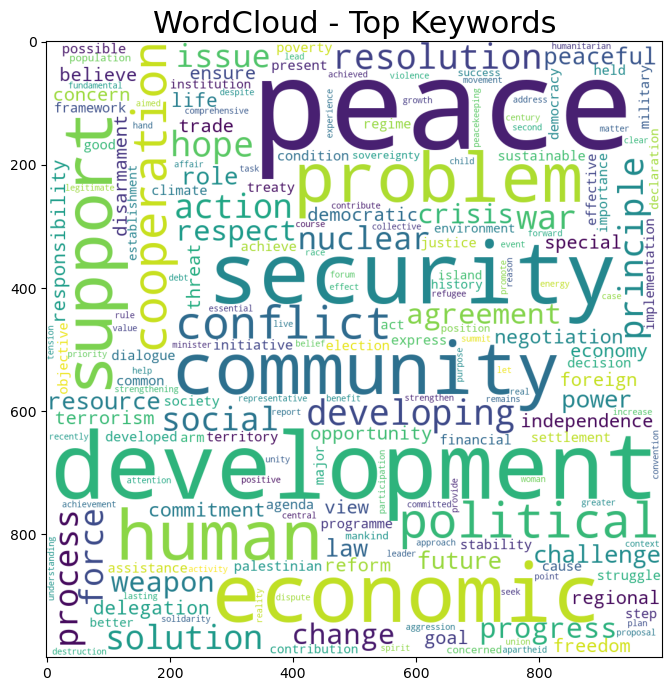

In [39]:
from wordcloud import WordCloud## WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Top Keywords", fontsize = 22)

In [40]:
# Let's save our cleaned dataset to excel
# df_final.to_excel("df_UN_cleaned.xlsx",  encoding='utf-8')

In [41]:
# Let's make sure the Year is of datatype 'int'
df_final['Year'] = df_final['Year'].astype('int')

C:\Users\DELL\AppData\Local\Temp\ipykernel_29252\324092758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Year'] = df_final['Year'].astype('int')


# Analysis of Keyword Frequencies over Time

## TF-IDF 

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create a document-term matrix using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df_final['Speech_cleaned_final'])

# Get top 10 words for each topic
terms = vectorizer.get_feature_names()
doc_term_matrix_array = doc_term_matrix.toarray()
word_freq = pd.DataFrame(doc_term_matrix_array, columns=terms)
top_words = word_freq.sum().sort_values(ascending=False)[:10]

# Print top 10 words
print(top_words)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


development    588.138168
peace          580.658102
security       494.256661
economic       425.338735
community      340.782485
human          332.036234
problem        321.898880
support        302.372795
political      281.273885
cooperation    277.808225
dtype: float64


In [43]:
# Create a dataframe to store TF-IDF values for each word in each document
df_final_tfidf = pd.DataFrame(doc_term_matrix.toarray(), columns=terms)
df_final_tfidf['Year'] = df_final['Year']
df_final_tfidf['Country'] = df_final['Country']

**Let's check the top words before 1980 and after 2010**

In [44]:
df1980 = df_final[df_final['Year'] < 1980]
df2010 = df_final[df_final['Year'] > 2010]

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

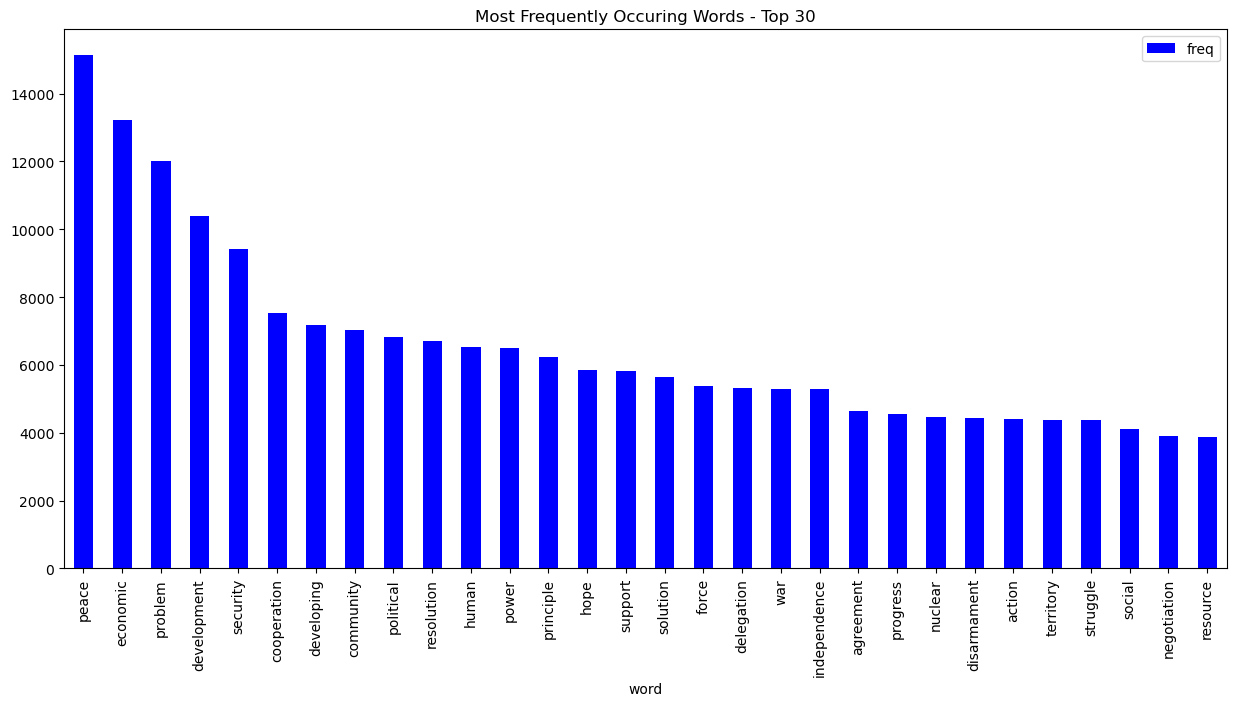

In [45]:
cv = CountVectorizer(stop_words = custom_stopwords)
words = cv.fit_transform(df1980.Speech_cleaned_final)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [46]:
doc_term_matrix = vectorizer.fit_transform(df1980['Speech_cleaned_final'])

# Get top 10 words for each topic
terms = vectorizer.get_feature_names()
doc_term_matrix_array = doc_term_matrix.toarray()
word_freq = pd.DataFrame(doc_term_matrix_array, columns=terms)
top_words = word_freq.sum().sort_values(ascending=False)[:10]

# Print top 10 words
print(top_words)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


peace          105.986633
economic        94.906580
problem         86.312801
development     75.565080
security        67.121359
cooperation     57.011453
developing      55.647098
community       52.542827
human           51.109030
resolution      50.936780
dtype: float64


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

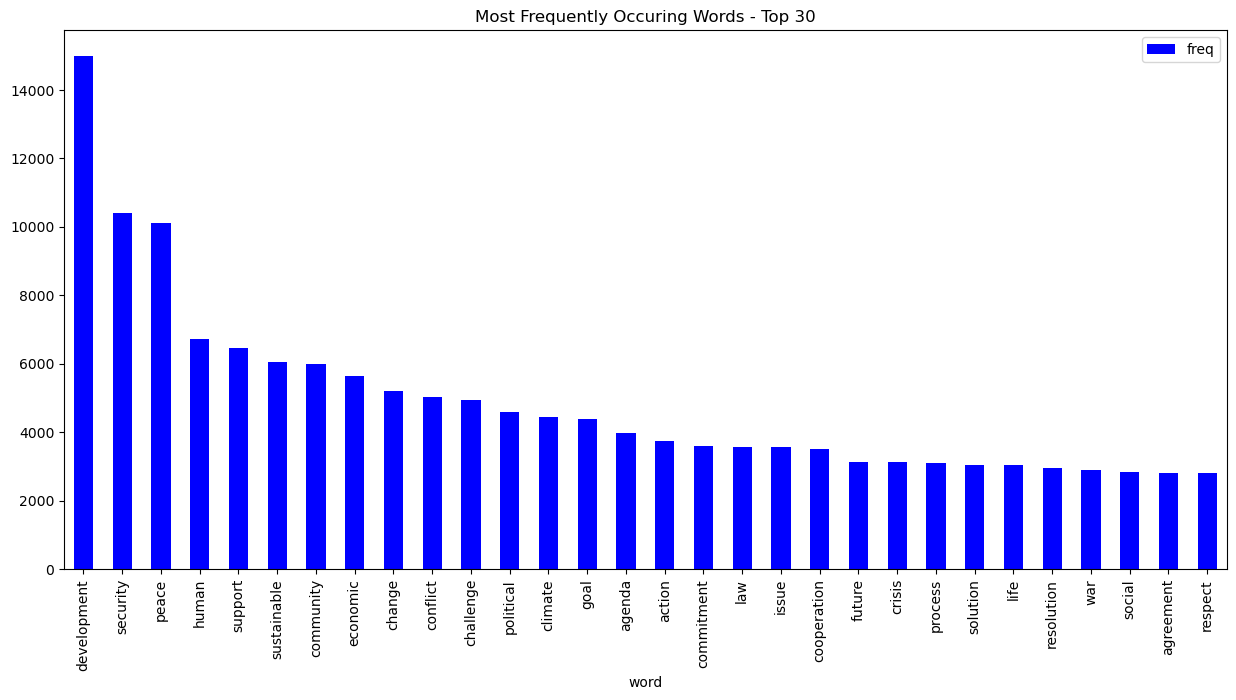

In [47]:
cv = CountVectorizer(stop_words = custom_stopwords)
words = cv.fit_transform(df2010.Speech_cleaned_final)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [48]:
doc_term_matrix = vectorizer.fit_transform(df2010['Speech_cleaned_final'])

# Get top 10 words for each topic
terms = vectorizer.get_feature_names()
doc_term_matrix_array = doc_term_matrix.toarray()
word_freq = pd.DataFrame(doc_term_matrix_array, columns=terms)
top_words = word_freq.sum().sort_values(ascending=False)[:10]

# Print top 10 words
print(top_words)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


development    135.735431
security        94.732632
peace           90.723344
human           65.136242
sustainable     62.938189
support         59.841967
community       55.895303
conflict        54.436228
economic        53.372502
change          51.529454
dtype: float64


## Trending Keywords

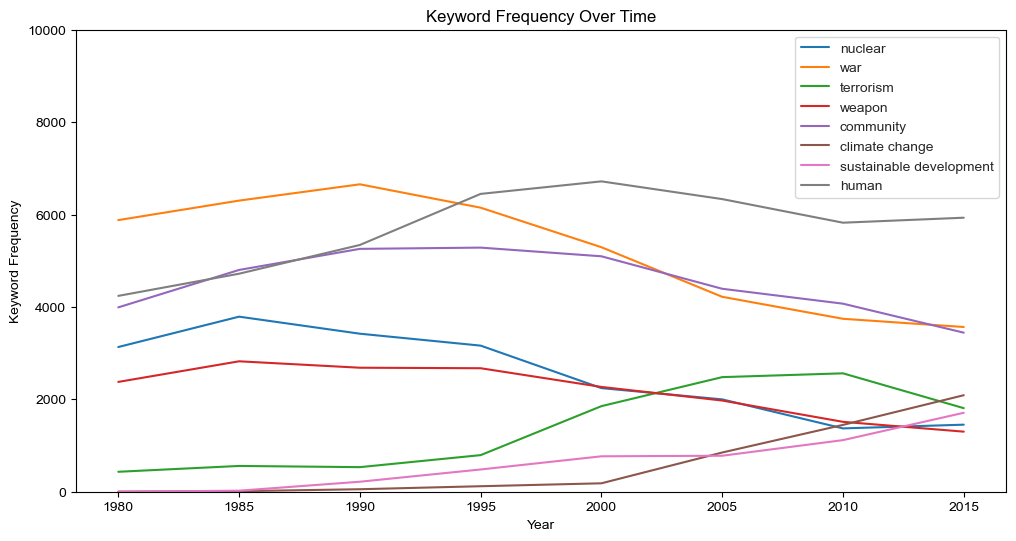

In [49]:
keywords = ['nuclear', 'war', 'terrorism', 'weapon','community', 'climate change', 'sustainable development', 'human']

# create a dictionary to store the keyword counts for each 5-year interval
interval_counts = {}

# loop through the rows of the DataFrame
for index, row in df_final.iterrows():
    # get the year
    year = row['Year']
    # get the cleaned speech text
    text = row['Speech_cleaned_final']
    # count the occurrences of each keyword in the text
    counts = {}
    for keyword in keywords:
        count = text.count(keyword)
        counts[keyword] = count
    # add the keyword counts to the interval_counts dictionary
    interval = (year // 5) * 5
    if interval not in interval_counts:
        interval_counts[interval] = {keyword: 0 for keyword in keywords}
    for keyword in keywords:
        interval_counts[interval][keyword] += counts[keyword]

# create a DataFrame from the interval_counts dictionary
df_counts = pd.DataFrame(interval_counts)

# calculate the rolling average for each keyword over a window of 3 intervals
rolling_avg = df_counts.rolling(window=3, axis=1).mean()

# create a line plot for each keyword using seaborn
fig, ax = plt.subplots(figsize=(12, 6))        
sns.set_style("whitegrid")
        
# create a line chart for each keyword
for keyword in keywords:
    # create lists of intervals and counts for the keyword
    intervals = list(rolling_avg.columns)
    counts = rolling_avg.loc[keyword]
    # plot the line chart
    sns.lineplot(x=intervals, y=counts, label=keyword)

# add a legend and labels
plt.legend()
plt.ylim(0,10000)
plt.xlabel('Year')
plt.ylabel('Keyword Frequency')
plt.title('Keyword Frequency Over Time')
plt.show()

## Down-trending keywords

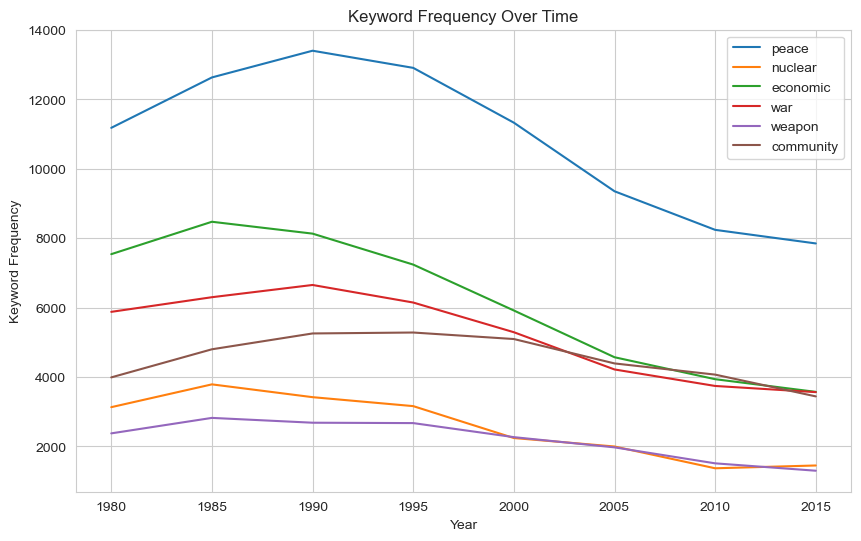

In [50]:
# define the keywords to track
keywords = ['peace', 'nuclear', 'economic', 'war', 'weapon', 'community']

# create a dictionary to store the keyword counts for each 5-year interval
interval_counts = {}

# loop through the rows of the DataFrame
for index, row in df_final.iterrows():
    # get the year
    year = row['Year']
    # get the cleaned speech text
    text = row['Speech_cleaned_final']
    # count the occurrences of each keyword in the text
    counts = {}
    for keyword in keywords:
        count = text.count(keyword)
        counts[keyword] = count
    # add the keyword counts to the interval_counts dictionary
    interval = (year // 5) * 5
    if interval not in interval_counts:
        interval_counts[interval] = {keyword: 0 for keyword in keywords}
    for keyword in keywords:
        interval_counts[interval][keyword] += counts[keyword]

# create a DataFrame from the interval_counts dictionary
df_counts = pd.DataFrame(interval_counts)

# calculate the rolling average for each keyword over a window of 3 intervals
rolling_avg = df_counts.rolling(window=3, axis=1).mean()

# create a line plot for each keyword using seaborn
fig, ax = plt.subplots(figsize=(10, 6))        
sns.set_style("whitegrid")
        
# create a line chart for each keyword
for keyword in keywords:
    # create lists of intervals and counts for the keyword
    intervals = list(rolling_avg.columns)
    counts = rolling_avg.loc[keyword]
    # plot the line chart
    sns.lineplot(x=intervals, y=counts, label=keyword)

# add a legend and labels
plt.legend()
plt.xlabel('Year')
plt.ylabel('Keyword Frequency')
plt.title('Keyword Frequency Over Time')
plt.show()

## Up-trending keywords

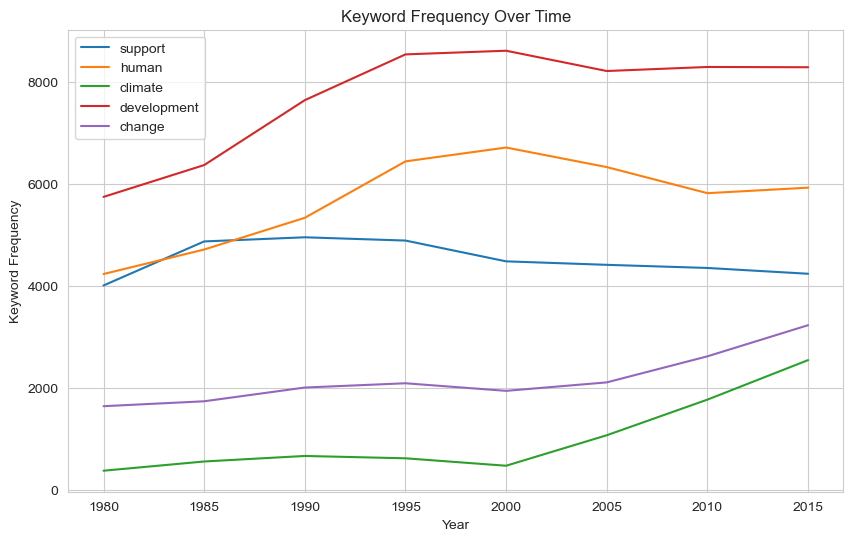

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# define the keywords to track
keywords = ['support', 'human', 'climate', 'development', 'change']

# create a dictionary to store the keyword counts for each 5-year interval
interval_counts = {}

# loop through the rows of the DataFrame
for index, row in df_final.iterrows():
    # get the year
    year = row['Year']
    # get the cleaned speech text
    text = row['Speech_cleaned_final']
    # count the occurrences of each keyword in the text
    counts = {}
    for keyword in keywords:
        count = text.count(keyword)
        counts[keyword] = count
    # add the keyword counts to the interval_counts dictionary
    interval = (year // 5) * 5
    if interval not in interval_counts:
        interval_counts[interval] = {keyword: 0 for keyword in keywords}
    for keyword in keywords:
        interval_counts[interval][keyword] += counts[keyword]

# create a DataFrame from the interval_counts dictionary
df_counts = pd.DataFrame(interval_counts)

# calculate the rolling average for each keyword over a window of 3 intervals
rolling_avg = df_counts.rolling(window=3, axis=1).mean()

# create a line plot for each keyword using seaborn
fig, ax = plt.subplots(figsize=(10, 6))        
sns.set_style("whitegrid")
        
# create a line chart for each keyword
for keyword in keywords:
    # create lists of intervals and counts for the keyword
    intervals = list(rolling_avg.columns)
    counts = rolling_avg.loc[keyword]
    # plot the line chart
    sns.lineplot(x=intervals, y=counts, label=keyword)

# add a legend and labels
plt.legend()
plt.xlabel('Year')
plt.ylabel('Keyword Frequency')
plt.title('Keyword Frequency Over Time')
plt.show()

# Topic Modeling - Latent Semantic Analysis

## Major Topics across the 49 years

In [55]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create a document-term matrix using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df_final['Speech_cleaned_final'])

# Apply LSA
num_topics = 10
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_model.fit(doc_term_matrix)

# Get top 10 words for each topic
terms = vectorizer.get_feature_names()
topic_terms = []
for i, comp in enumerate(lsa_model.components_):
    topic_terms.append([terms[index] for index in comp.argsort()[:-11:-1]])
    print(f"Top 10 words for Topic {i}: {', '.join(topic_terms[i])}")
    
# Transform document-term matrix into LSA space
doc_topic_matrix = lsa_model.transform(doc_term_matrix)

# Create a dataframe to store topic probabilities for each document
topic_names = [f"Topic {i}" for i in range(num_topics)]
df_final_lsa = pd.DataFrame(doc_topic_matrix, columns=topic_names)
df_final_lsa['Year'] = df_final['Year']
df_final_lsa['Country'] = df_final['Country']

Top 10 words for Topic 0: development, peace, security, economic, community, problem, human, support, cooperation, political
Top 10 words for Topic 1: problem, independence, struggle, aggression, territory, disarmament, regime, power, racist, detente
Top 10 words for Topic 2: security, terrorism, peace, palestinian, israeli, terrorist, iraqi, syrian, resolution, union
Top 10 words for Topic 3: nuclear, weapon, disarmament, treaty, cooperation, security, peacekeeping, arm, socialist, proposal
Top 10 words for Topic 4: human, democracy, power, society, century, latin, freedom, war, want, let
Top 10 words for Topic 5: island, pacific, nuclear, climate, weapon, change, sustainable, imperialist, ocean, sids
Top 10 words for Topic 6: viet, nam, development, imperialist, socialist, lao, struggle, sustainable, imperialism, kampuchea
Top 10 words for Topic 7: cyprus, island, climate, sustainable, turkish, cypriot, change, solution, greece, detente
Top 10 words for Topic 8: chad, delegation, pea

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Major Topics before 1980

In [56]:
# Create a document-term matrix using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df1980['Speech_cleaned_final'])

# Apply LSA
num_topics = 10
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_model.fit(doc_term_matrix)

# Get top 10 words for each topic
terms = vectorizer.get_feature_names()
topic_terms = []
for i, comp in enumerate(lsa_model.components_):
    topic_terms.append([terms[index] for index in comp.argsort()[:-11:-1]])
    print(f"Top 10 words for Topic {i}: {', '.join(topic_terms[i])}")
    
# Transform document-term matrix into LSA space
doc_topic_matrix = lsa_model.transform(doc_term_matrix)

# Create a dataframe to store topic probabilities for each document
topic_names = [f"Topic {i}" for i in range(num_topics)]
df1980_lsa = pd.DataFrame(doc_topic_matrix, columns=topic_names)
df1980_lsa['Year'] = df_final['Year']
df1980_lsa['Country'] = df_final['Country']

Top 10 words for Topic 0: peace, economic, problem, development, security, cooperation, developing, community, human, resolution
Top 10 words for Topic 1: struggle, imperialist, aggression, imperialism, socialist, liberation, independence, force, palestinian, zionist
Top 10 words for Topic 2: nuclear, socialist, disarmament, detente, weapon, mongolian, treaty, security, cooperation, soviet
Top 10 words for Topic 3: war, latin, terrorism, man, violence, law, men, power, imperialist, true
Top 10 words for Topic 4: israeli, palestinian, resolution, peace, zionist, palestine, security, occupied, territory, land
Top 10 words for Topic 5: nuclear, superpower, war, pacific, weapon, power, issue, imperialist, uganda, let
Top 10 words for Topic 6: palestinian, economic, zionist, oil, israeli, energy, aggression, nuclear, imperialist, kampuchea
Top 10 words for Topic 7: developing, delegation, development, sea, peace, developed, landlocked, mongolian, resolution, bangladesh
Top 10 words for Topi

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Major Topics post 2010

In [57]:
# Create a document-term matrix using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df2010['Speech_cleaned_final'])

# Apply LSA
num_topics = 10
lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
lsa_model.fit(doc_term_matrix)

# Get top 10 words for each topic
terms = vectorizer.get_feature_names()
topic_terms = []
for i, comp in enumerate(lsa_model.components_):
    topic_terms.append([terms[index] for index in comp.argsort()[:-11:-1]])
    print(f"Top 10 words for Topic {i}: {', '.join(topic_terms[i])}")
    
# Transform document-term matrix into LSA space
doc_topic_matrix = lsa_model.transform(doc_term_matrix)

# Create a dataframe to store topic probabilities for each document
topic_names = [f"Topic {i}" for i in range(num_topics)]
df2010_lsa = pd.DataFrame(doc_topic_matrix, columns=topic_names)
df2010_lsa['Year'] = df_final['Year']
df2010_lsa['Country'] = df_final['Country']

Top 10 words for Topic 0: development, security, peace, human, sustainable, support, community, conflict, economic, change
Top 10 words for Topic 1: island, development, sids, climate, sustainable, pacific, ocean, agenda, change, developing
Top 10 words for Topic 2: island, pacific, sids, ocean, climate, change, war, leader, marshall, let
Top 10 words for Topic 3: island, security, pacific, sids, syrian, palestinian, kingdom, terrorism, bahrain, resolution
Top 10 words for Topic 4: nuclear, human, sustainable, weapon, humanitarian, conflict, security, refugee, migration, law
Top 10 words for Topic 5: mali, sahel, migration, refugee, union, somalia, climate, chad, conflict, woman
Top 10 words for Topic 6: kingdom, development, syrian, terrorist, terrorism, agenda, bahrain, post, bangladesh, extremism
Top 10 words for Topic 7: asean, somalia, peace, lao, viet, nam, somali, palestinian, mediation, nepal
Top 10 words for Topic 8: nuclear, korean, mali, peninsula, peace, weapon, sahel, asea

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Vocal countries for Sustainability

In [58]:
# We'll analyse post 2000 to observe the recent trends
df2000 = df_final[df_final['Year'] >= 2000]

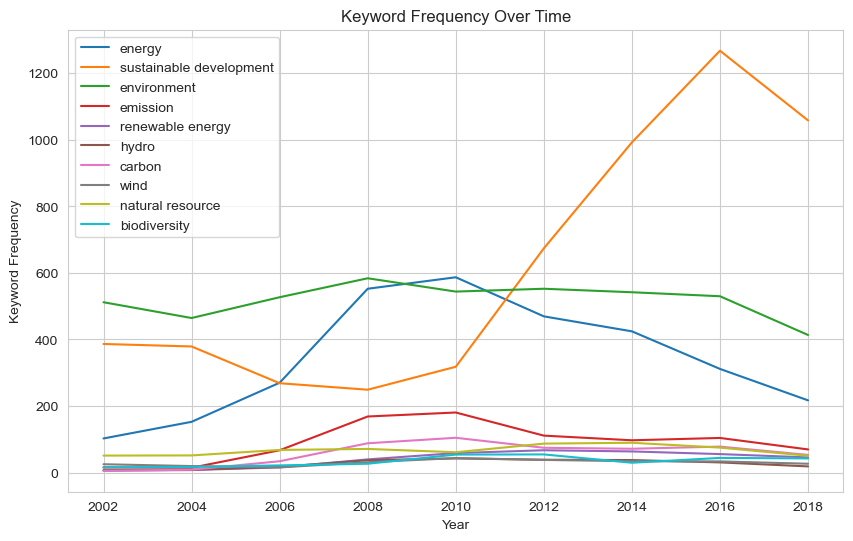

In [59]:
# define the keywords to track
# The keywords are obtained by checking the topics and using other similar frequently occuring words in speeches
keywords = ['energy', 'sustainable development', 'environment', 'emission', 'renewable energy', 'hydro', 'carbon', 'wind', 'natural resource', 'biodiversity']

# create a dictionary to store the keyword counts for each 5-year interval
interval_counts = {}

# loop through the rows of the DataFrame
for index, row in df2000.iterrows():
    # get the year
    year = row['Year']
    # get the cleaned speech text
    text = row['Speech_cleaned_final']
    # count the occurrences of each keyword in the text
    counts = {}
    for keyword in keywords:
        count = text.count(keyword)
        counts[keyword] = count
    # add the keyword counts to the interval_counts dictionary
    interval = (year // 2) * 2
    if interval not in interval_counts:
        interval_counts[interval] = {keyword: 0 for keyword in keywords}
    for keyword in keywords:
        interval_counts[interval][keyword] += counts[keyword]

# create a DataFrame from the interval_counts dictionary
df_counts = pd.DataFrame(interval_counts)

# calculate the rolling average for each keyword over a window of 3 intervals
rolling_avg = df_counts.rolling(window=2, axis=1).mean()

# create a line plot for each keyword using seaborn
fig, ax = plt.subplots(figsize=(10, 6))        
sns.set_style("whitegrid")
        
# create a line chart for each keyword
for keyword in keywords:
    # create lists of intervals and counts for the keyword
    intervals = list(rolling_avg.columns)
    counts = rolling_avg.loc[keyword]
    # plot the line chart
    sns.lineplot(x=intervals, y=counts, label=keyword)

# add a legend and labels
plt.legend()
plt.xlabel('Year')
plt.ylabel('Keyword Frequency')
plt.title('Keyword Frequency Over Time')
plt.show()

In [60]:
# Define the start year
start_year = 2000

# Filter the DataFrame to include speeches after the start year
df_filtered = df_final[df_final['Year'] >= start_year]

# Calculate the frequency of each topic for each country
df_topic_counts = pd.DataFrame()
for topic in keywords:
    df_topic_counts[topic] = df_filtered['Speech_cleaned_final'].apply(lambda x: x.count(topic))
df_topic_counts['Country'] = df_filtered['Country']

# Group the DataFrame by country and sum the topic counts
df_sustainability = df_topic_counts.groupby('Country').sum()


In [61]:
# Let's sum the counts of individual keywords to get our topic count for Sustainability
df_sustainability['Sustainability'] = df_sustainability.sum(axis = 'columns') 

In [62]:
# Let's check our Sustainability dataframe
df_sustainability

,energy,sustainable development,environment,emission,renewable energy,hydro,carbon,wind,natural resource,biodiversity,Sustainability
Country,,,,,,,,,,,
AFG,5,7,7,0,0,2,2,0,2,0,25
AGO,1,25,29,1,0,0,1,0,6,1,64
ALB,18,30,15,3,4,3,0,4,0,0,77
AND,14,32,36,4,1,0,2,1,3,0,93
ARE,43,20,27,0,8,0,1,0,2,0,101
...,...,...,...,...,...,...,...,...,...,...,...
YEM,11,5,13,0,0,0,0,0,0,0,29
YUG,0,0,1,0,0,0,0,0,0,0,1
ZAF,9,37,17,2,0,0,0,0,2,0,67


In [63]:
# Let's save the dataframe in Excel
# df_sustainability.to_excel("Sustainability_Countries.xlsx")

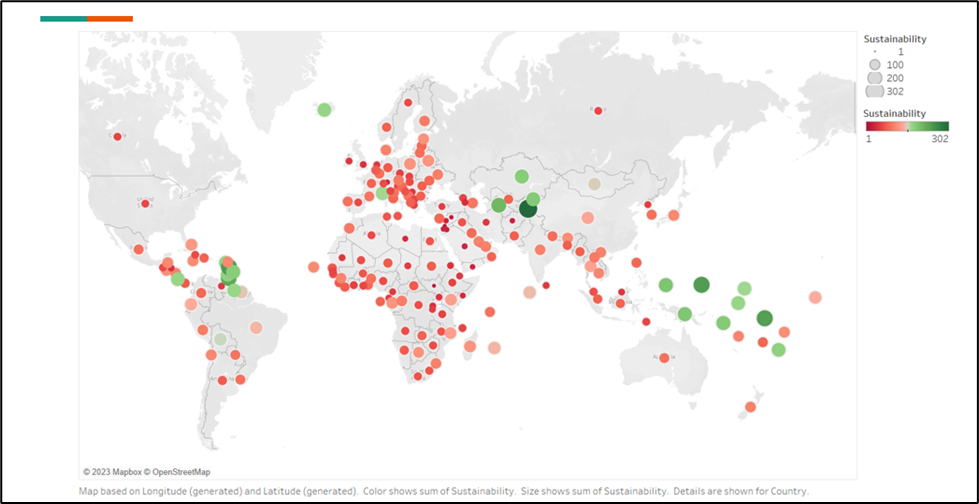

# Vocal countries for Climate

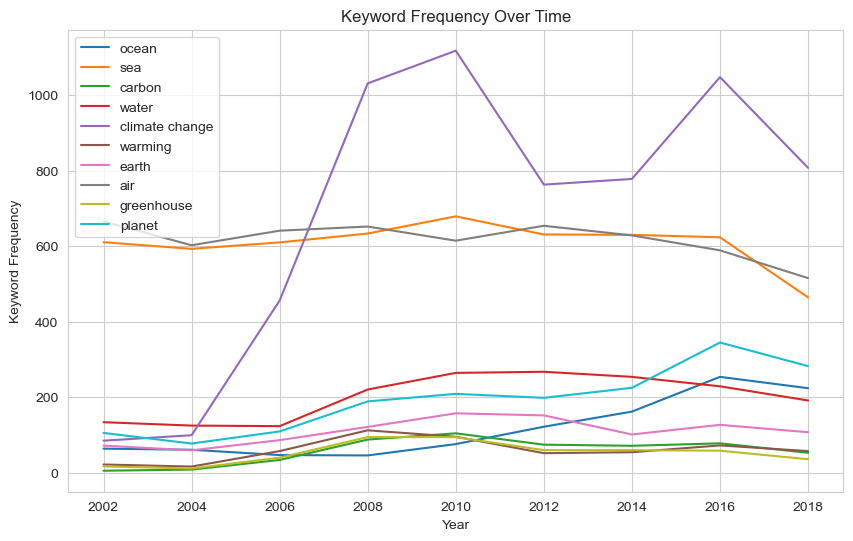

In [64]:
# define the keywords to track
# The keywords are obtained by checking the topics and using other similar frequently occuring words in speeches

keywords = ['ocean', 'sea', 'carbon', 'water', 'climate change', 'warming', 'earth', 'air', 'greenhouse', 'planet']

# create a dictionary to store the keyword counts for each 5-year interval
interval_counts = {}

# loop through the rows of the DataFrame
for index, row in df2000.iterrows():
    # get the year
    year = row['Year']
    # get the cleaned speech text
    text = row['Speech_cleaned_final']
    # count the occurrences of each keyword in the text
    counts = {}
    for keyword in keywords:
        count = text.count(keyword)
        counts[keyword] = count
    # add the keyword counts to the interval_counts dictionary
    interval = (year // 2) * 2
    if interval not in interval_counts:
        interval_counts[interval] = {keyword: 0 for keyword in keywords}
    for keyword in keywords:
        interval_counts[interval][keyword] += counts[keyword]

# create a DataFrame from the interval_counts dictionary
df_counts = pd.DataFrame(interval_counts)

# calculate the rolling average for each keyword over a window of 3 intervals
rolling_avg = df_counts.rolling(window=2, axis=1).mean()

# create a line plot for each keyword using seaborn
fig, ax = plt.subplots(figsize=(10, 6))        
sns.set_style("whitegrid")
        
# create a line chart for each keyword
for keyword in keywords:
    # create lists of intervals and counts for the keyword
    intervals = list(rolling_avg.columns)
    counts = rolling_avg.loc[keyword]
    # plot the line chart
    sns.lineplot(x=intervals, y=counts, label=keyword)

# add a legend and labels
plt.legend()
plt.xlabel('Year')
plt.ylabel('Keyword Frequency')
plt.title('Keyword Frequency Over Time')
plt.show()

In [65]:
# Define the start year
start_year = 2000

# Filter the DataFrame to include speeches after the start year
df_filtered = df_final[df_final['Year'] >= start_year]

# Calculate the frequency of each topic for each country
df_topic_counts = pd.DataFrame()
for topic in keywords:
    df_topic_counts[topic] = df_filtered['Speech_cleaned_final'].apply(lambda x: x.count(topic))
df_topic_counts['Country'] = df_filtered['Country']

# Group the DataFrame by country and sum the topic counts
df_climate = df_topic_counts.groupby('Country').sum()


In [66]:
# Let's sum the counts of individual keywords to get our topic count for Sustainability
df_climate['Climate'] = df_climate.sum(axis = 'columns') 

In [67]:
# Let's check our Sustainability dataframe
df_climate

,ocean,sea,carbon,water,climate change,warming,earth,air,greenhouse,planet,Climate
Country,,,,,,,,,,,
AFG,0,4,2,3,4,0,3,28,0,1,45
AGO,0,21,1,5,18,4,2,35,3,9,98
ALB,0,12,0,1,15,1,0,13,1,10,53
AND,1,20,2,9,46,6,16,30,3,26,159
ARE,0,17,1,13,8,0,0,67,0,1,107
...,...,...,...,...,...,...,...,...,...,...,...
YEM,0,14,0,7,6,3,0,32,0,0,62
YUG,0,0,0,0,0,0,0,2,0,1,3
ZAF,0,24,0,7,38,0,5,29,0,2,105


In [68]:
# Let's save the dataframe in Excel
# df_climate.to_excel("Climate_Countries.xlsx")

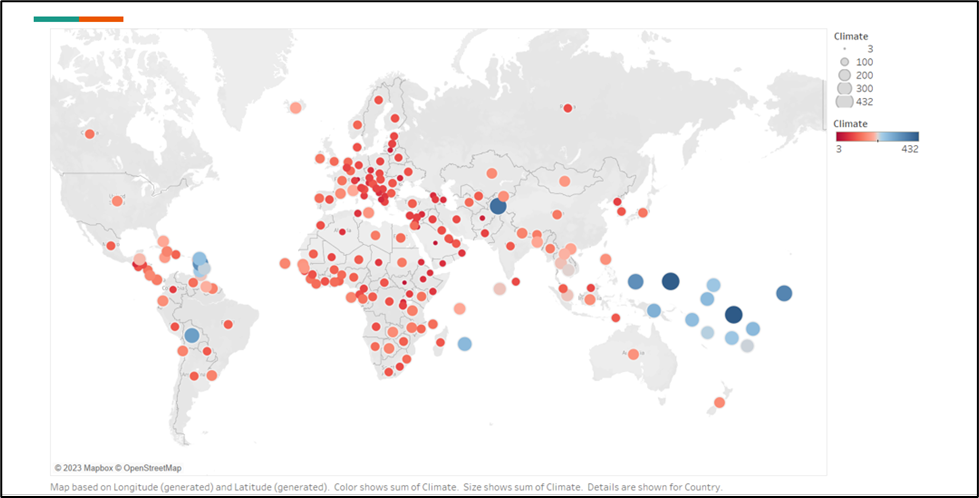